# Exercise 2: Data Processing and Analysis

In [1]:
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
try:
    from gofer.ok import check
except:
    %pip install git+https://github.com/grading/gradememaybe.git
    from gofer.ok import check

Today we're working with simulated smartwatch health data. You'll notice when you read in the csv file that we have 7 columns: User ID, Heart Rate (BPM), Blood Oxygen Level (%), Step Count, Sleep Duration (hours), Activity Level, and Stress Level. We're going to go through and "clean up" the data so that we can calculate some basic statistics such as mean, median, minimum, and maximum for each variable. Run the cell below to read in the table saving it in the variable `smartwatch`. 

In [2]:
smartwatch = pd.read_csv("unclean_smartwatch_health_data.csv")
smartwatch

User ID  Heart Rate (BPM)  Blood Oxygen Level (%)    Step Count  \
0      4174.0         58.939776               98.809650   5450.390578   
1         NaN               NaN               98.532195    727.601610   
2      1860.0        247.803052               97.052954   2826.521994   
3      2294.0         40.000000               96.894213  13797.338044   
4      2130.0         61.950165               98.583797  15679.067648   
...       ...               ...                     ...           ...   
9995   1524.0         78.819386               98.931927   2948.491953   
9996   4879.0         48.632659               95.773035   4725.623070   
9997   2624.0         73.834442               97.945874   2571.492060   
9998   4907.0               NaN               98.401058   3364.788855   
9999   4113.0         70.063864               98.475606    544.696104   

     Sleep Duration (hours) Activity Level Stress Level  
0         7.167235622316564  Highly Active            1  
1         6.538239375570314  Highly_Active            5  
2                     ERROR  Highly Active            5  
3         7.367789630207228          Actve            3  
4                       NaN  Highly_Active            6  
...                     ...            ...          ...  
9995      7.402748595032027         Active            7  
9996     6.3821659358529015      Sedentary            2  
9997       6.91654920303435      Sedentary            4  
9998      5.691233932149209         Active            8  
9999      5.691001039740254          Actve            5  

[10000 rows x 7 columns]

Let's start together with the Heart Rate column. Just looking at the preview table above we can see two things right away: (1) we have `NaN` values meaning data was not collected for those individuals, and (2) some of the heart rate values are abnormally high i.e. `247.803052`. Let's see what the entire range of values look like. 

In [3]:
print(smartwatch['Heart Rate (BPM)'].min(), smartwatch['Heart Rate (BPM)'].max())

40.0 296.5939695131042


**Question 1**: Set the variables below equal to the minimum heart rate and the maximum heart rate in the dataset. This is just practice for the method of checking answers as you go. Afterwards run the cell below to check your answer. 

In [4]:
minimumHeartRate = smartwatch['Heart Rate (BPM)'].min()
maximumHeartRate = smartwatch['Heart Rate (BPM)'].max()

In [13]:
check('tests/q1.py')

KeyError: 'image/svg+xml'

Notice that the maximum value of `296` beats per minimute is WAY above normal range of heart rates. In fact, according to [heart.org](https://www.heart.org/en/healthy-living/fitness/fitness-basics/target-heart-rates) the highest estimated heart rate based on age ranges from 150 to 200 for adults. This will vary between individuals, but this is a good starting point for us to think about outliers in the heart rate values in this dataset. Let's see how many rows have missing data or heart rates above 200. 

In [5]:
## select rows where Heart Rate is NaN or rows where the heart rate is above 200. 
# Emphasis on the usage of 'or' here, we want rows where either 
# scenario 1 (NaN) OR scenario 2 (>200) is true. 

outlierHeartRaterows = smartwatch[smartwatch['Heart Rate (BPM)'] > 200]
nullHeartRaterows = smartwatch[smartwatch['Heart Rate (BPM)'].isnull()]

print(len(outlierHeartRaterows) + len(nullHeartRaterows))

print(outlierHeartRaterows)

450
      User ID  Heart Rate (BPM)  Blood Oxygen Level (%)    Step Count  \
2      1860.0        247.803052               97.052954   2826.521994   
337    2369.0        200.491642               95.441773   2998.761919   
393    2443.0        219.199178               95.497181   1227.804688   
403    3200.0        232.944907               96.011492   9402.746140   
595    2129.0        264.467356               97.161853   2555.402184   
649    2008.0        226.256725               98.356789   2739.171166   
818    3156.0        265.542910                     NaN   7281.778831   
1195   3261.0        207.102188               99.652006   2867.872064   
1391   4621.0        207.430243               96.688083  20577.677290   
1602   4737.0        215.194681               95.095839  16072.283561   
2023      NaN        204.067811               99.032130  17620.765455   
2211   2711.0        209.773924               97.852781   1786.998129   
2212   4020.0        228.498078               9

In [7]:
## Now let's get a table of all the other rows. 
heartrateRows = smartwatch[(~smartwatch['Heart Rate (BPM)'].isnull()) & (smartwatch['Heart Rate (BPM)'] <= 200)]

print(heartrateRows)

      User ID  Heart Rate (BPM)  Blood Oxygen Level (%)    Step Count  \
0      4174.0         58.939776               98.809650   5450.390578   
3      2294.0         40.000000               96.894213  13797.338044   
4      2130.0         61.950165               98.583797  15679.067648   
5      2095.0         96.285938               94.202910  10205.992256   
6      4772.0         47.272257               95.389760   3208.781177   
...       ...               ...                     ...           ...   
9994   1942.0         77.912299               98.640583  10061.145291   
9995   1524.0         78.819386               98.931927   2948.491953   
9996   4879.0         48.632659               95.773035   4725.623070   
9997   2624.0         73.834442               97.945874   2571.492060   
9999   4113.0         70.063864               98.475606    544.696104   

     Sleep Duration (hours) Activity Level Stress Level  
0         7.167235622316564  Highly Active            1  
3      

**Question 2:** 

Notice here that the length of the two tables (`450` and `9550`) add up to the total number rows (`n=10000`). This is a good sanity check as we manipulate the table. Now we have to decide how we deal with these missing values and outliers. One method to do this would be remove all the rows with null values or outlier values. Another method is use imputation - this can be done in several ways but below we're going to substitute the average heart rate for the missing and mismeasured values. Do we think this will change the mean?

In [9]:
HeartRateMean = heartrateRows["Heart Rate (BPM)"].mean()
print(HeartRateMean)


75.13268404820141


In [10]:
outlierHeartRaterows['Heart Rate (BPM)'] = HeartRateMean
nullHeartRaterows['Heart Rate (BPM)'] = HeartRateMean


print(outlierHeartRaterows)

      User ID  Heart Rate (BPM)  Blood Oxygen Level (%)    Step Count  \
2      1860.0         75.132684               97.052954   2826.521994   
337    2369.0         75.132684               95.441773   2998.761919   
393    2443.0         75.132684               95.497181   1227.804688   
403    3200.0         75.132684               96.011492   9402.746140   
595    2129.0         75.132684               97.161853   2555.402184   
649    2008.0         75.132684               98.356789   2739.171166   
818    3156.0         75.132684                     NaN   7281.778831   
1195   3261.0         75.132684               99.652006   2867.872064   
1391   4621.0         75.132684               96.688083  20577.677290   
1602   4737.0         75.132684               95.095839  16072.283561   
2023      NaN         75.132684               99.032130  17620.765455   
2211   2711.0         75.132684               97.852781   1786.998129   
2212   4020.0         75.132684               95.28

/tmp/ipykernel_3913/936369900.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  outlierHeartRaterows['Heart Rate (BPM)'] = HeartRateMean
/tmp/ipykernel_3913/936369900.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  nullHeartRaterows['Heart Rate (BPM)'] = HeartRateMean


In [11]:
smartwatch_hr = pd.concat([outlierHeartRaterows, nullHeartRaterows, heartrateRows])

fullTableHRMean = smartwatch_hr['Heart Rate (BPM)'].mean()
print(fullTableHRMean)

75.13268404820141


In [ ]:
check('tests/q2.py')

Notice how the mean doesn't change when you use the imputed mean as the substituted values. However, as a note this will change the distribution of values and has the potential to obscure the causes of missing values or outliers. 

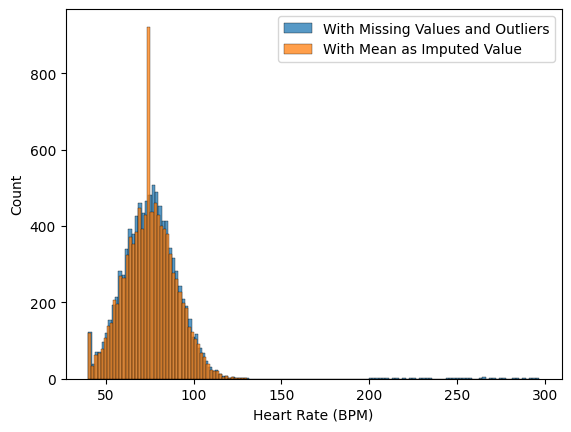

In [12]:
sns.histplot(smartwatch['Heart Rate (BPM)'], label ='With Missing Values and Outliers')
sns.histplot(smartwatch_hr['Heart Rate (BPM)'], label = 'With Mean as Imputed Value')
plt.legend()

**Question 3**: How does the imputation method affect the median values?  Remember the table `smartwatch` remains unchanged and can be used to find the original median value. 

ANSWER: Because the outliers are generally extremely high, the median is lower after the imputation method.

...

In [13]:
## coding cell to check the difference in median values 

fullTableHRMedian = smartwatch['Heart Rate (BPM)'].median() ## median of original data
print(fullTableHRMedian)

fullTableHRMedianO = smartwatch_hr['Heart Rate (BPM)'].median() ## median of imputed data
print(fullTableHRMedianO)


75.22060125775644
75.13268404820141


Now let's repeat this process for the other columns as well. 

**Question 4**: Find the minimum, maximum, and mean Blood Oxygen Level. 

In [14]:
minBloodO2 = smartwatch['Blood Oxygen Level (%)'].min()
maxBloodO2 = smartwatch['Blood Oxygen Level (%)'].max()
meanBloodO2 = smartwatch['Blood Oxygen Level (%)'].mean()

print(minBloodO2, maxBloodO2, meanBloodO2)

90.79120814564097 100.0 97.84158102099076


In [23]:
check('tests/q4.py')

KeyError: 'image/svg+xml'

We can do some visualizations using a box plot to better decide if there's any outliers we'd like to remove. Maybe you decide that everything below 92.5 is an outlier should be removed or maybe you decide to keep all of the values or maybe you decide to remove all values under 94% since that falls outside of a normal, healthy range according to doctors (I would not suggest this last one as it would obscure quite a bit of data! But some analysts might consider it!). In question 5, you can make that decision and justify your answer. 

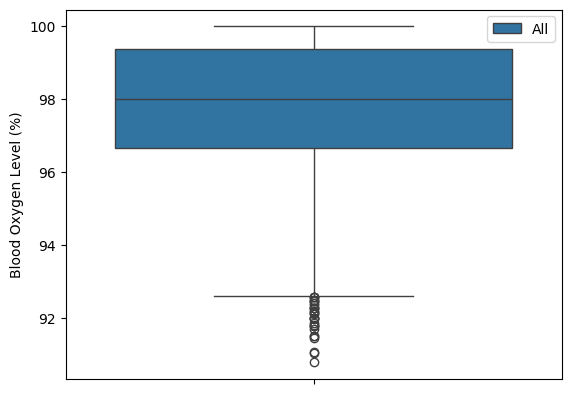

In [15]:
sns.boxplot(smartwatch['Blood Oxygen Level (%)'], label = 'All')
plt.legend()

**Question 5**: Decide how you want to deal with missing and outlier values in the Blood Oxygen Level column. Set your final table equal to the variable `smartwatch_o2`. Use the space below to explain your decisions. 

Notes: Refer to [this article](https://pmc.ncbi.nlm.nih.gov/articles/PMC5548942/) on methods of handling these type of instances in data. Keep in mind, you might find that either there are no missing values or no outliers. That's okay, just indicate that in the written space below and update the table i.e. `smartwatch_o2 = smartwatch_hr`

ANSWER: I used <92.5 as my outliers because they fall significantly outside of the average range and may be a result of mismeasurements.

....

In [16]:
## use this space or additional cells to deal with the missing/outlier values. 

smartwatch_out = smartwatch[smartwatch['Blood Oxygen Level (%)'] < 92.5]
nullBloodrows = smartwatch[smartwatch['Blood Oxygen Level (%)'].isnull()]

bloodRows = smartwatch[(~smartwatch['Blood Oxygen Level (%)'].isnull()) & (smartwatch['Blood Oxygen Level (%)'] > 92.5)]

print(len(bloodRows))
print(bloodRows)


9673
      User ID  Heart Rate (BPM)  Blood Oxygen Level (%)    Step Count  \
0      4174.0         58.939776               98.809650   5450.390578   
1         NaN               NaN               98.532195    727.601610   
2      1860.0        247.803052               97.052954   2826.521994   
3      2294.0         40.000000               96.894213  13797.338044   
4      2130.0         61.950165               98.583797  15679.067648   
...       ...               ...                     ...           ...   
9995   1524.0         78.819386               98.931927   2948.491953   
9996   4879.0         48.632659               95.773035   4725.623070   
9997   2624.0         73.834442               97.945874   2571.492060   
9998   4907.0               NaN               98.401058   3364.788855   
9999   4113.0         70.063864               98.475606    544.696104   

     Sleep Duration (hours) Activity Level Stress Level  
0         7.167235622316564  Highly Active            1  
1 

Moving onto the Step Count column. 

**Question 6**: Find the minimum, maximum, and mean step counts. 

In [17]:
minSteps = smartwatch['Step Count'].min()

maxSteps = smartwatch['Step Count'].max()

meanSteps = smartwatch['Step Count'].mean()

print(minSteps, maxSteps, meanSteps)

0.9101380609604088 62486.690753464914 6985.685884992229


In [27]:
check('tests/q6.py')

KeyError: 'image/svg+xml'

**Question 7**: Decide how you want to deal with missing and outlier values in the Steps column. Set your final table equal to the variable `smartwatch_steps`. Use the space below to explain your decisions. 

Notes: Refer to [this article](https://pmc.ncbi.nlm.nih.gov/articles/PMC5548942/) on methods of handling these type of instances in data. Keep in mind, you might find that either there are no missing values or no outliers. That's okay, just indicate that in the written space below and update the table i.e. `smartwatch_steps = smartwatch_o2`

ANSWER: It is scientifically frowned upon/unheard of to have over 50,000 steps in a day; therefore, I removed values over that number.

....

In [18]:
## use this space or additional cells to address the missing or outlier data. 

smartwatch_steps = smartwatch[(~smartwatch['Step Count'].isnull()) & (smartwatch['Step Count'] < 50000)]

print(len(smartwatch_steps))
print(smartwatch_steps)

9891
      User ID  Heart Rate (BPM)  Blood Oxygen Level (%)    Step Count  \
0      4174.0         58.939776               98.809650   5450.390578   
1         NaN               NaN               98.532195    727.601610   
2      1860.0        247.803052               97.052954   2826.521994   
3      2294.0         40.000000               96.894213  13797.338044   
4      2130.0         61.950165               98.583797  15679.067648   
...       ...               ...                     ...           ...   
9995   1524.0         78.819386               98.931927   2948.491953   
9996   4879.0         48.632659               95.773035   4725.623070   
9997   2624.0         73.834442               97.945874   2571.492060   
9998   4907.0               NaN               98.401058   3364.788855   
9999   4113.0         70.063864               98.475606    544.696104   

     Sleep Duration (hours) Activity Level Stress Level  
0         7.167235622316564  Highly Active            1  
1 

Next onto the Sleep Duration column. 

**Question 8**: Try finding the minimum number of hours slept among participants. 

In [19]:
minSleep = smartwatch['Sleep Duration (Hours)'].min()


print(minSleep)

KeyError: 'Sleep Duration (Hours)'

In the error message, you should see the phrase: 

`TypeError: '<=' not supported between instances of 'str' and 'float'`

This means that the column is a combination of multiple data types. If you recall, we discussed computer readable data that columns HAVE to contain just a single data type. Having a combination of strings, characters, and numbers in a column will only cause more issues downstream. Let's try to figure out all the instances of non-numerical values in the column. 

First let's try to identify all the non-numerical values to make sure removing them doesn't obscure any important information. 

In [20]:
for value in smartwatch['Sleep Duration (hours)'].unique():  ## Loop through each unique item in the column
    try:
        numericVal = float(smartwatch['Sleep Duration (hours)'])  ## first try to see if it can be converted to a number
    except:
        print(smartwatch['Sleep Duration (hours)'])  ## if it can't be converted print it to screen 

0        7.167235622316564
1        6.538239375570314
2                    ERROR
3        7.367789630207228
4                      NaN
               ...        
9995     7.402748595032027
9996    6.3821659358529015
9997      6.91654920303435
9998     5.691233932149209
9999     5.691001039740254
Name: Sleep Duration (hours), Length: 10000, dtype: object
0        7.167235622316564
1        6.538239375570314
2                    ERROR
3        7.367789630207228
4                      NaN
               ...        
9995     7.402748595032027
9996    6.3821659358529015
9997      6.91654920303435
9998     5.691233932149209
9999     5.691001039740254
Name: Sleep Duration (hours), Length: 10000, dtype: object
0        7.167235622316564
1        6.538239375570314
2                    ERROR
3        7.367789630207228
4                      NaN
               ...        
9995     7.402748595032027
9996    6.3821659358529015
9997      6.91654920303435
9998     5.691233932149209
9999     5.6910010

So, we find that the only non-numerical value is the string `ERROR`. We can fix this in two ways. First let's try fixing it by splitting the tables like we've done previously. 

In [21]:
errorTable = smartwatch_steps[smartwatch_steps['Sleep Duration (hours)'] == 'ERROR']
print(errorTable)

      User ID  Heart Rate (BPM)  Blood Oxygen Level (%)    Step Count  \
2      1860.0        247.803052               97.052954   2826.521994   
62     3068.0        115.078288               99.928041   1918.372142   
71     3041.0         64.799778               94.743857   4613.859266   
81     4499.0         41.709895               96.857347   1413.015778   
92     2021.0         70.243810               97.171134   2336.583406   
...       ...               ...                     ...           ...   
9901   2269.0         63.369107               96.229029   6656.786482   
9912   2074.0         75.933666               97.386073   1813.072248   
9927   3007.0         87.579045               98.768633   3727.161872   
9943   2961.0         91.834863               96.145378  38831.465057   
9951   3104.0         70.335328               98.560133   1997.442874   

     Sleep Duration (hours) Activity Level Stress Level  
2                     ERROR  Highly Active            5  
62     

Observe that we've created a table with the rows with `ERROR` in the sleep duration column. We can now replace with the `ERROR` value with our handy NaN value for doing numerical statistics. 

In [22]:
errorTable['Sleep Duration (hours)'] = np.nan

print(errorTable)

      User ID  Heart Rate (BPM)  Blood Oxygen Level (%)    Step Count  \
2      1860.0        247.803052               97.052954   2826.521994   
62     3068.0        115.078288               99.928041   1918.372142   
71     3041.0         64.799778               94.743857   4613.859266   
81     4499.0         41.709895               96.857347   1413.015778   
92     2021.0         70.243810               97.171134   2336.583406   
...       ...               ...                     ...           ...   
9901   2269.0         63.369107               96.229029   6656.786482   
9912   2074.0         75.933666               97.386073   1813.072248   
9927   3007.0         87.579045               98.768633   3727.161872   
9943   2961.0         91.834863               96.145378  38831.465057   
9951   3104.0         70.335328               98.560133   1997.442874   

      Sleep Duration (hours) Activity Level Stress Level  
2                        NaN  Highly Active            5  
62   

/tmp/ipykernel_3913/2212040875.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errorTable['Sleep Duration (hours)'] = np.nan


Now we could go through and put the tables back together, but another method to do this is to use a built-in function to pandas called `pd.to_numeric()`. Let's try that. 

In [23]:
## create a copy of the table 
smartwatch_sleep = smartwatch_steps

smartwatch_sleep['Sleep Duration (hours)'] = pd.to_numeric(smartwatch_sleep['Sleep Duration (hours)'], errors='coerce')

print(smartwatch_sleep)

      User ID  Heart Rate (BPM)  Blood Oxygen Level (%)    Step Count  \
0      4174.0         58.939776               98.809650   5450.390578   
1         NaN               NaN               98.532195    727.601610   
2      1860.0        247.803052               97.052954   2826.521994   
3      2294.0         40.000000               96.894213  13797.338044   
4      2130.0         61.950165               98.583797  15679.067648   
...       ...               ...                     ...           ...   
9995   1524.0         78.819386               98.931927   2948.491953   
9996   4879.0         48.632659               95.773035   4725.623070   
9997   2624.0         73.834442               97.945874   2571.492060   
9998   4907.0               NaN               98.401058   3364.788855   
9999   4113.0         70.063864               98.475606    544.696104   

      Sleep Duration (hours) Activity Level Stress Level  
0                   7.167236  Highly Active            1  
1    

/tmp/ipykernel_3913/3090856236.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  smartwatch_sleep['Sleep Duration (hours)'] = pd.to_numeric(smartwatch_sleep['Sleep Duration (hours)'], errors='coerce')


Now we can finish **Question 8** and find the minimum, maximum, and mean of the sleep duration column. 

In [24]:
minSleep = smartwatch_sleep['Sleep Duration (hours)'].min()

maxSleep = smartwatch_sleep['Sleep Duration (hours)'].max()

meanSleep = smartwatch_sleep['Sleep Duration (hours)'].mean()

print(minSleep, maxSleep, meanSleep)

-0.1944527906201543 12.140232872862926 6.507621049318487


In [ ]:
check('tests/q8.py')

**Question 9**: Decide how you want to deal with missing and outlier values in the sleep column. Set your final table equal to the variable `smartwatch_updated_sleep`. Use the space below to explain your decisions. 

*Remember to start with the `smartwatch_sleep` table that we just created.*

Notes: Refer to [this article](https://pmc.ncbi.nlm.nih.gov/articles/PMC5548942/) on methods of handling these type of instances in data. Keep in mind, you might find that either there are no missing values or no outliers. That's okay, just indicate that in the written space below and update the table i.e. `smartwatch_updated_sleep = smartwatch_sleep`

ANSWER: I got rid of the data points with negative amounts of sleep, seeing as that isn't possible. I didn't remove anything from the top because 12 hours, while a lot, is possible.

....

In [ ]:
## use this space or additional cells to address the missing or outlier data. 


smartwatch_updated_sleep = smartwatch_sleep[(smartwatch_sleep['Sleep Duration (hours)'] > 0)]
smartwatch_updated_sleep

User ID  Heart Rate (BPM)  Blood Oxygen Level (%)    Step Count  \
0      4174.0         58.939776               98.809650   5450.390578   
1         NaN               NaN               98.532195    727.601610   
3      2294.0         40.000000               96.894213  13797.338044   
5      2095.0         96.285938               94.202910  10205.992256   
6      4772.0         47.272257               95.389760   3208.781177   
...       ...               ...                     ...           ...   
9995   1524.0         78.819386               98.931927   2948.491953   
9996   4879.0         48.632659               95.773035   4725.623070   
9997   2624.0         73.834442               97.945874   2571.492060   
9998   4907.0               NaN               98.401058   3364.788855   
9999   4113.0         70.063864               98.475606    544.696104   

      Sleep Duration (hours) Activity Level Stress Level  
0                   7.167236  Highly Active            1  
1                   6.538239  Highly_Active            5  
3                   7.367790          Actve            3  
5                   8.378343  Highly_Active           10  
6                   7.871146     Seddentary            2  
...                      ...            ...          ...  
9995                7.402749         Active            7  
9996                6.382166      Sedentary            2  
9997                6.916549      Sedentary            4  
9998                5.691234         Active            8  
9999                5.691001          Actve            5  

[9498 rows x 7 columns]

We're going to skip the `Activity Level` column for a minute and look at the `Stress Level` column. If we try getting the minimum, we'll find the same error as in the Sleep column where we have mixed data types (strings and numerical values). Let's use the same type of loop to make sure we don't obscure any data by forcing the strings to NaN values. 

In [31]:
for item in smartwatch_updated_sleep['Stress Level'].unique():
    try:
        int(item)
    except:
        print(item)

nan
Very High


**Question 10**: 

What might you decide to do to deal with the `Very High` value? 

Go ahead and do so below and give a brief case for doing so here. Assign your table to the variable `smartwatch_stress`. 

ANSWER: I am unsure what value the user would conflate that to, so I made it nan.

In [39]:
## cell to deal with 'Very High' value


smartwatch_stress = smartwatch_updated_sleep[smartwatch_updated_sleep['Stress Level'] == 'Very High']
smartwatch_stress['Stress Level'] = np.nan

print(smartwatch_stress)


      User ID  Heart Rate (BPM)  Blood Oxygen Level (%)    Step Count  \
23     3391.0         76.325520               98.757110    508.838098   
44     4547.0         79.617792               98.894373  10415.917714   
285    4152.0         65.108094               95.935126  24409.676512   
379    4170.0         70.455114                     NaN   4452.438735   
404    2884.0         75.987904               96.577431   7758.834990   
494    4394.0               NaN               96.108114   7302.374982   
817    2062.0         84.122429               98.175028   9827.280181   
1161   1666.0         80.008987               99.705600   9034.982217   
1308   3870.0         53.358019               97.642963   8095.726849   
1342   4371.0        102.295089               95.297737   8876.260802   
1367   3306.0         68.393698               99.134959   1680.731240   
1945   4004.0               NaN               96.837078    291.736435   
2541   1574.0         57.556699               97.97

/tmp/ipykernel_3913/1096349954.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  smartwatch_stress['Stress Level'] = np.nan


Finally, let's go back to the `Activity Level` column and investigate what types of values we find there. 

In [42]:
print(smartwatch['Activity Level'].unique())

['Highly Active' 'Highly_Active' 'Actve' 'Seddentary' 'Sedentary' 'Active'
 nan]


**Question 12**: 

What do you notice? There are several values that could and should be combined because they represent the same information. Let's go ahead and do that. While combining these columns, let's also create a new column `NumActivity` where we give a numerical value to represent the activity level. Assign your final table to the variable `final_table`. 

`Highly Active` = `1`

`Active` = `2`

`Sedentary` = `3`



In [43]:
## Highly Active 
highlyActive = smartwatch_stress[(smartwatch_stress['Activity Level'] == 'Highly Active') | (smartwatch_stress['Activity Level'] == 'Highly_Active')]  ## Pull out rows for two unique values matching highly active
highlyActive['Activity Level'] = 'Highly Active'  ## Reset the text in the column to either 'Highly Active'
highlyActive['NumActivity'] = 1 ## set the number for the numerical value 


## Active
active = smartwatch_stress[(smartwatch_stress['Activity Level'] == 'Actve') | (smartwatch_stress['Activity Level'] == 'Active')]
active['Activity Level'] = 'Active'
active['NumActivity'] = 2

## Sedentary 
sedentary = smartwatch_stress[(smartwatch_stress['Activity Level'] == 'Sedentary') | (smartwatch_stress['Activity Level'] == 'Seddentary')]
sedentary['Activity Level'] = 'Sedentary'
sedentary['NumActivity'] = 3

final_table = pd.concat([highlyActive, active, sedentary, smartwatch_stress[smartwatch_stress['Activity Level'].isnull()]])
final_table

/tmp/ipykernel_3913/1369629786.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  highlyActive['Activity Level'] = 'Highly Active'  ## Reset the text in the column to either 'Highly Active'
/tmp/ipykernel_3913/1369629786.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  highlyActive['NumActivity'] = 1 ## set the number for the numerical value
/tmp/ipykernel_3913/1369629786.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_inde

User ID  Heart Rate (BPM)  Blood Oxygen Level (%)    Step Count  \
3963   4670.0         70.659253               99.072904   6042.576181   
4551   1726.0         91.127561              100.000000   4213.519341   
4675   4627.0         74.776893               99.630704  12557.592821   
4800   3320.0         66.331358               99.903851    819.769598   
5823   3775.0               NaN               97.095137   2092.055907   
6593   2230.0         64.132175               99.001954   8978.106601   
6794   3690.0         72.904796              100.000000    161.588757   
8125   1935.0         48.423820               95.860970   5024.236245   
8298   4611.0         93.591129              100.000000  17193.090393   
9656   1566.0         95.945551              100.000000   1350.867640   
285    4152.0         65.108094               95.935126  24409.676512   
494    4394.0               NaN               96.108114   7302.374982   
1367   3306.0         68.393698               99.134959   1680.731240   
1945   4004.0               NaN               96.837078    291.736435   
2764   4072.0         55.858910               97.963146   7556.420784   
2841   1813.0         99.448037               97.245927   1048.807497   
3321   1845.0         48.814491               94.897978   6169.212871   
3349   2079.0         65.576048               96.220124  21864.149667   
5175   2681.0         83.416616               95.620551  31921.700416   
7189   2291.0         75.176916               96.187686   8333.684215   
8266   2901.0         75.286696               98.055694   1731.911975   
8482   1890.0         65.616368               98.879327   2700.965039   
9772   4122.0         50.269429               98.602140  16865.919678   
23     3391.0         76.325520               98.757110    508.838098   
44     4547.0         79.617792               98.894373  10415.917714   
379    4170.0         70.455114                     NaN   4452.438735   
404    2884.0         75.987904               96.577431   7758.834990   
817    2062.0         84.122429               98.175028   9827.280181   
1161   1666.0         80.008987               99.705600   9034.982217   
1308   3870.0         53.358019               97.642963   8095.726849   
1342   4371.0        102.295089               95.297737   8876.260802   
2541   1574.0         57.556699               97.978496   1293.655022   
2867   1044.0         97.463412               97.859315  11823.771545   
3269   2428.0         48.725600               98.031503    974.830399   
4302   2904.0         77.265298                     NaN   5015.965189   
5561   1115.0         83.250700               97.724932   6721.341031   
5965   2962.0         79.300571                     NaN   2836.349664   
6847   2257.0         79.578177               99.280578   4172.469927   
7139   3285.0         66.392092               98.857359   7571.648275   
7858   3472.0               NaN               96.396043   9554.486964   
8236   4594.0         69.215888               99.377268   5085.817921   
8351   2519.0         81.991309               97.292655   7255.516967   
8691   2979.0         51.738902                     NaN   3254.282966   
9010   2714.0         94.360519               96.731081    879.418998   
9922   1069.0         84.953455               97.498987   1147.216620   

      Sleep Duration (hours) Activity Level  Stress Level  NumActivity  
3963                6.453973  Highly Active           NaN          1.0  
4551                6.915594  Highly Active           NaN          1.0  
4675                6.396437  Highly Active           NaN          1.0  
4800                7.255158  Highly Active           NaN          1.0  
5823                4.712288  Highly Active           NaN          1.0  
6593                5.613833  Highly Active           NaN          1.0  
6794                7.626350  Highly Active           NaN          1.0  
8125                4.116067  Highly Active           NaN      

Let's check to make sure that we no longer have any missing values in each column (besides the Activity Level/NumActivity, Stress Level, and User ID columns). You likely either removed those rows or imputed a value to substitute the missing values. 

In [44]:
final_table.isnull().sum()

User ID                    0
Heart Rate (BPM)           4
Blood Oxygen Level (%)     4
Step Count                 0
Sleep Duration (hours)     0
Activity Level             0
Stress Level              45
NumActivity                0
dtype: int64

Then let's use the info function to make sure each column has the data type we're expecting. 

In [45]:
final_table.info()

<class 'pandas.core.frame.DataFrame'>
Index: 45 entries, 3963 to 9922
Data columns (total 8 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   User ID                 45 non-null     float64
 1   Heart Rate (BPM)        41 non-null     float64
 2   Blood Oxygen Level (%)  41 non-null     float64
 3   Step Count              45 non-null     float64
 4   Sleep Duration (hours)  45 non-null     float64
 5   Activity Level          45 non-null     object 
 6   Stress Level            0 non-null      float64
 7   NumActivity             45 non-null     float64
dtypes: float64(7), object(1)
memory usage: 3.2+ KB


**Question 13**: 

Let's visualize two of the variables. Let's pick `Heart Rate (BPM)` and then you can select any other numerical variable. We're going to create a scatter plot using matplotlib.pyplot. Example code is: 

`plt.scatter(x, y)` where x and y are your columns of data such as df['label']

Also try including a size parameter to make your points smaller to better see patterns. We'll talk more about creating figures in python in a few weeks, but for now let's just look at the broad patterns. 

Example of including size parameter: 

`plt.scatter(x, y, s=1)` Try changing the `s` parameter to 10, 1, 0.5, and 0.1. 

What do you notice?

ANSWER: There isn't a huge correlation between steps and heart rate. I expected that it could conflate based on heart health or heart rate while walking/exercising, but it didn't.

...

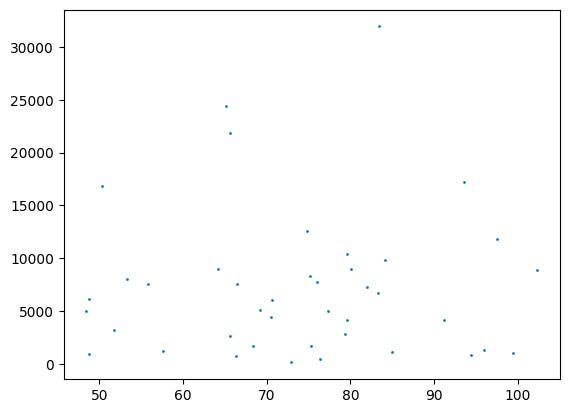

In [50]:
plt.scatter(final_table['Heart Rate (BPM)'], final_table['Step Count'], s=1)

**Question 14**: 


Read in the CSV table where we kept all the NaN values instead of removing or imputing them. Repeat the exact same visualization as above with this data. 

Compare the two figures. What do you notice?

ANSWER: There is way more data in this table, but there still is no correlation. This might have made a bigger difference if the variables were originally correlated.

...

In [51]:
nanTable = pd.read_csv('smartwatch_nan_vals.csv')

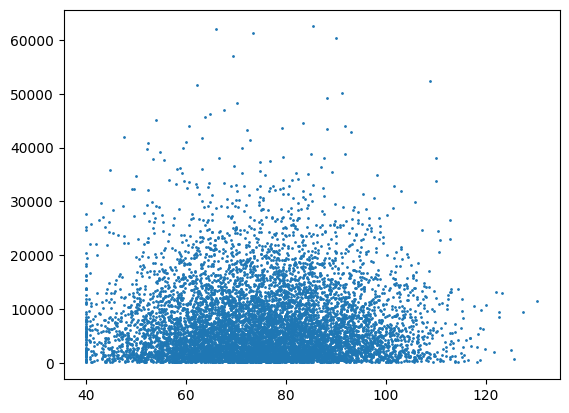

In [53]:
plt.scatter(nanTable['Heart Rate (BPM)'], nanTable['Step Count'], s = 1)

**Question 15**: 


Does the amount of steps signficantly differ between the different activity level groups? 

Hint: Try using a boxplot (`sns.boxplot`) to first visualize the problem. Then you can use scipy.stats to run an ANOVA. 

<function boxplot at 0x77ca43bc4cc0>


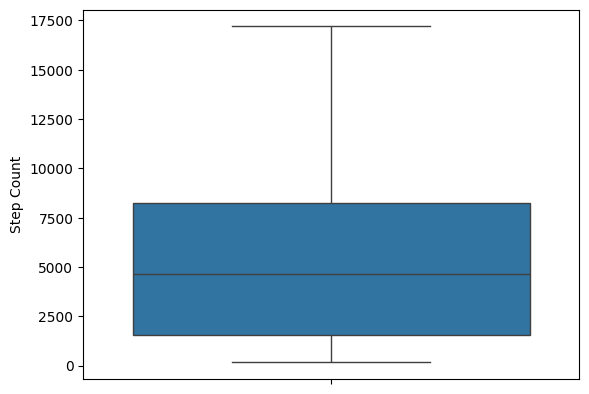

In [65]:
## Visualization 

final_table_high = final_table[final_table['NumActivity'] == 1]
sns.boxplot(final_table_high['Step Count'], label = 'All')
print(sns.boxplot)


<function boxplot at 0x77ca43bc4cc0>


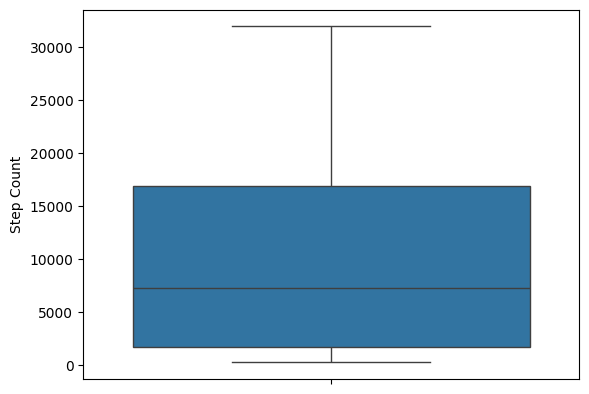

In [66]:

final_table_act = final_table[final_table['NumActivity'] == 2]
sns.boxplot(final_table_act['Step Count'], label = 'All')
print(sns.boxplot)

<function boxplot at 0x77ca43bc4cc0>


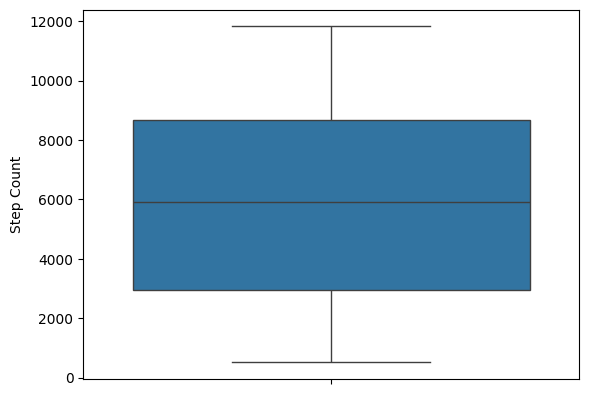

In [64]:

final_table_sed = final_table[final_table['NumActivity'] == 3]
sns.boxplot(final_table_sed['Step Count'], label = 'All')
print(sns.boxplot)

Is there significant difference between the groups' step counts?  

ANSWER: Yes, it counterintuitively appears that sedentary, active, then highly active has the most to least steps.

...

**Question 16**

If you were to present your findings from this dataset to a broader audience (such as policymakers, healthcare providers, or the general public), how would you communicate key insights responsibly? What considerations would you take into account to avoid misrepresenting the data or reinforcing biases?

ANSWER: There are a lot of places where the data may fall flat in its ability to properly represent a population. Because there were so many extraneous and impossible values, it is hard to know whether the sensible values that remain in the final data are accurately measured. Additionally, these values do not effectively convey health, because health doesn't look the same for each person. Having less steps or a high blood pressure doesn't mean someone is not healthy, so there must be measures taken to ensure that those circumstances aren't used against those individuals. Additonally, those who are, in fact, less healthy should not be compromised by high insurance rates and social stigma by using this data as "proof," or at all.

....